<a href="https://colab.research.google.com/github/Mahyah2/ML_PROJ/blob/main/Kaggle_Breast_Cancer_Wisconsin_Diagnosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---ML | Kaggle Breast Cancer Wisconsin Diagnosis using Logistic Regression



In [4]:
# Importing the NumPy library for performing linear algebra operations,
# such as matrix manipulations and numerical computations.
import numpy as np

# Importing the Pandas library for data processing,
# including data manipulation, cleaning, and analysis.
import pandas as pd

# Importing Matplotlib's Pyplot module for data visualization,
# enabling the creation of graphs and plots.
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("data.csv")

print (data.head)


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [6]:
data.info()
#This helps to know the structure of the data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Dropping unnecessary columns ('Unnamed: 32' and 'id') from the dataset.
# 'axis=1' specifies that we are removing columns (not rows).
data.drop(['Unnamed: 32', 'id'], axis=1)

# Encoding the 'diagnosis' column:
# If the value is "M" (Malignant), it is replaced with 1.
# If the value is "B" (Benign), it is replaced with 0.
# This converts categorical values into numerical ones for machine learning models.
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]


In [8]:
# Extracting the target variable (labels) from the dataset.
# 'y' will contain the diagnosis values as a NumPy array.
# It holds 1 for Malignant and 0 for Benign cases.
y = data.diagnosis.values

# Creating the feature set (independent variables) by dropping the 'diagnosis' column.
# 'x_data' will now contain all other columns except 'diagnosis',
# which will be used as input features for the model.
x_data = data.drop(['diagnosis'], axis=1)


In [9]:
# Normalizing the feature set using Min-Max Scaling.
# This scales all feature values to a range between 0 and 1.
# Formula: (X - X_min) / (X_max - X_min)
x = (x_data - np.min( x_data)) / (np.max(x_data) - np.min(x_data))

In [10]:
# Importing train_test_split from scikit-learn to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (85%) and testing (15%) sets.
# 'test_size=0.15' means 15% of the data will be used for testing.
# 'random_state=42' ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42
)

# Transposing the matrices to match the expected input shape for certain ML models.
# This converts rows into columns and vice versa.
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

# Printing the shapes of the training and testing sets to confirm the split.
print("x train: ", x_train.shape)  # Shape of training features
print("x test: ", x_test.shape)    # Shape of testing features
print("y train: ", y_train.shape)  # Shape of training labels
print("y test: ", y_test.shape)    # Shape of testing labels


x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


In [11]:
# WEIGHT AND BIAS

def initialize_weights_and_bias(dimension):
    # Initializing weights (w) as a column vector filled with small values (0.01).
    # Using small but non-zero values helps break symmetry during training.
    w = np.full((dimension, 1), 0.01)

    # Initializing bias (b) to 0.0.
    b = 0.0

    return w, b  # Returning the initialized weight matrix and bias term.


In [12]:
# SIGMOID FUNCTION - CALCULATING Z VALUE

# Computing the linear transformation:
# z = np.dot(w.T, x_train) + b
# This represents the weighted sum of inputs plus the bias term.

def sigmoid(z):
    # Applying the sigmoid function to transform 'z' into a probability value.
    y_head = 1 / (1 + np.exp(-z))

    return y_head  # Returning the computed sigmoid output.


In [13]:
# FORWARD - BACKWARD PROPAGATION

def forward_backward_propagation(w, b, x_train, y_train):

    # Forward Propagation:
    # Compute the linear transformation: z = w^T * x_train + b
    z = np.dot(w.T, x_train) + b

    # Apply the sigmoid function to obtain predicted probabilities (y_head)
    y_head = sigmoid(z)

    # Compute the logistic regression loss function:
    # Loss = -[y_train * log(y_head) + (1 - y_train) * log(1 - y_head)]
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)

    # Compute the cost (average loss over all training samples)
    cost = np.sum(loss) / x_train.shape[1]

    # Backward Propagation:
    # Compute the gradient of the weights (partial derivative of cost w.r.t. w)
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]

    # Compute the gradient of the bias (partial derivative of cost w.r.t. b)
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]

    # Store the computed gradients in a dictionary
    gradients = {
        "derivative_weight": derivative_weight,
        "derivative_bias": derivative_bias
    }

    return cost, gradients  # Return the cost and computed gradients


In [14]:
#UPDATING PARAMETERS


def update(w, b, x_train, y_train, learning_rate, number_of_iteration):

    cost_list = []  # Stores cost values for every iteration
    cost_list2 = []  # Stores cost values at intervals for plotting
    index = []  # Stores iteration indices for plotting

    # Perform gradient descent for a given number of iterations
    for i in range(number_of_iteration):
        # Compute cost and gradients using forward and backward propagation
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)  # Store cost value

        # Update weights using gradient descent formula
        w = w - learning_rate * gradients["derivative_weight"]

        # Update bias using gradient descent formula
        b = b - learning_rate * gradients["derivative_bias"]

        # Every 10 iterations, store cost for visualization
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" % (i, cost))  # Print cost at intervals

    # Store updated parameters in a dictionary
    parameters = {"weight": w, "bias": b}

    # Plot cost reduction over iterations
    plt.plot(index, cost_list2)  # Plot cost at recorded intervals
    plt.xticks(index, rotation='vertical')  # Rotate x-axis labels for readability
    plt.xlabel("Number of Iterations")  # Label x-axis
    plt.ylabel("Cost")  # Label y-axis
    plt.show()  # Display plot

    return parameters, gradients, cost_list  # Return updated parameters, final gradients, and cost history


In [15]:
# PREDICTIONS

def predict(w, b, x_test):


    # Compute the linear transformation: z = w^T * x_test + b
    z = sigmoid(np.dot(w.T, x_test) + b)  # Apply sigmoid to get probabilities

    # Initialize an array of zeros for storing predicted labels
    Y_prediction = np.zeros((1, x_test.shape[1]))

    # Convert probabilities to binary labels (0 or 1)
    # If probability is greater than 0.5, classify as 1 (positive class)
    # Otherwise, classify as 0 (negative class)
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction  # Return predicted labels


Cost after iteration 0: 0.693154
Cost after iteration 10: 0.660391
Cost after iteration 20: 0.660133
Cost after iteration 30: 0.660019
Cost after iteration 40: 0.659917
Cost after iteration 50: 0.659824
Cost after iteration 60: 0.659739
Cost after iteration 70: 0.659663
Cost after iteration 80: 0.659593
Cost after iteration 90: 0.659530


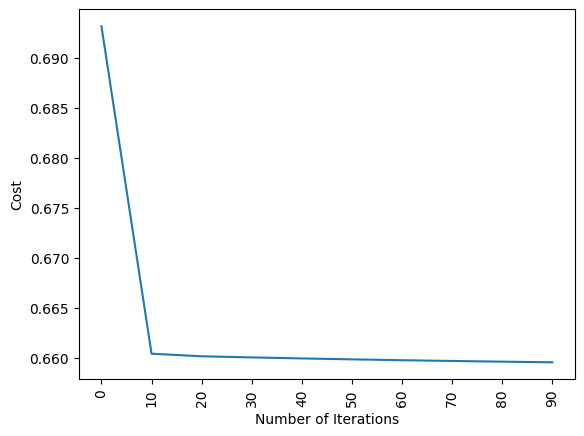


Train Accuracy: 62.73 %
Test Accuracy: 37.21 %


In [31]:
def logistic_regression(x_train, y_train, x_test, y_test,
                        learning_rate, num_iterations):

    # Initialize weights and bias
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Train the model
    parameters, _, _ = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Make predictions
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)

    # Compute accuracies
    train_accuracy = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100

    print(f"\nTrain Accuracy: {train_accuracy:.2f} %")
    print(f"Test Accuracy: {test_accuracy:.2f} %")

# Run logistic regression
logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate=1, num_iterations=100)


In [32]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer for handling missing values
from sklearn import linear_model  # Importing linear_model for logistic regression

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
# Transpose (T) is used to preserve the original structure after transformation
x_train = imputer.fit_transform(x_train.T).T  # Fit & transform training data
x_test = imputer.transform(x_test.T).T  # Transform test data using the same imputer

# Initialize the logistic regression model with a random seed and maximum iterations
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)

# Train the model on the training data and evaluate its accuracy on the test set
print("test accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

# Train the model again on the training data and evaluate its accuracy on the training set
print("train accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))




test accuracy: 0.6162790697674418 
train accuracy: 0.6314699792960663 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
